# Semantic Link

- More information: https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-overview

### Usually returns a pandas dataframe or a FabricDataFrame
### FabricDataFrame
- Supports all pandas operations.
- Subclasses the pandas DataFrame and adds metadata, such as semantic information and lineage.
- Exposes semantic functions and the add-measure method that lets you use Power BI measures in data science work.
- Can run type(df) to see what object type it is - pandas - i.e. pandas.core.frame.DataFrame

## Install  Semantic Link
## Already installed in Python Notebook and Spark
## Will update to latest version

In [ ]:
%pip install -U semantic-link

## Check what version installed

In [1]:
%pip list | grep -i semantic-link-sempy

semantic-link-sempy                0.11.0
Note: you may need to restart the kernel to use updated packages.


## Scale Up in Pure Python Notebook
##### Options are 2,4,8,16 (32 and 64)
##### **Note: Increases start-up time and resources used**
##### **Default is trying to get you in and working quickly**
https://learn.microsoft.com/en-us/fabric/data-engineering/using-python-experience-on-notebook#session-configuration-magic-command

In [4]:
%%configure - f
{
    "vCores": 4
}

MagicUsageError: The current running session must be restarted for the config changes to take effect. Specify the argument "-f" to force restarting session. Any variables stored in memory will be cleared.

### Import and alias

In [6]:
import sempy.fabric as fabric

from sempy.relationships import plot_relationship_metadata
from sempy.relationships import find_relationships
from sempy.fabric import list_relationship_violations

### List Semantic Models (datasets)

## **Hover over - list_datasets**

In [3]:
df = fabric.list_datasets()
display(df)

### Pass parameters - explicit 

In [4]:
ws = "AtlantaBI_SLL"

df = fabric\
    .list_datasets(
    workspace = ws,
    mode= "xmla",
    additional_xmla_properties=None    
    )

display(df)

### Export list to a csv file located in the Lakehouse

In [5]:
df.to_csv("/lakehouse/default/Files/semanticmodels.csv")

In [ ]:
modeltables = fabric.list_tables(dataset='Hyrule10K')
display(modeltables)

### Read Product Table - Parameters using position and explicit

In [ ]:
df = fabric.read_table(\
    "Hyrule10K", 
    "Product", 
    workspace="AtlantaBI_SLL"
    )

df.sample(5)

### Show relationships

In [ ]:
hyruleSemanticModel = "Hyrule10K"
relationships = fabric.list_relationships(hyruleSemanticModel)
relationships

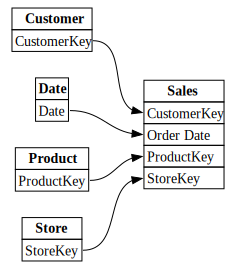

In [29]:
plot_relationship_metadata(relationships)

## See the invisible (hidden)

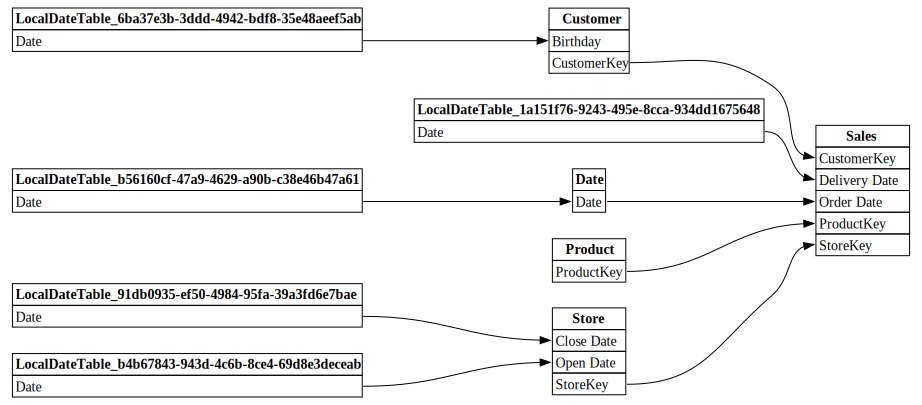

In [30]:
hyruledate_semanticmodel = "Hyrule10K_WithAutoDate"
relationships_date = fabric.list_relationships(hyruledate_semanticmodel)
plot_relationship_metadata(relationships_date)

### Run DAX code against Semantic Modal

In [8]:
ds = "Hyrule10K"
ws = "AtlantaBI_SLL"
dax = \
"""
EVALUATE 
SUMMARIZECOLUMNS(
    'Product'[Brand],
   'Date'[Month Short],
   'Date'[Year],
   "Sales Amount",
    CALCULATE([Sales Amount]))
"""

fabric.evaluate_dax(\
    dataset=ds,
    dax_string= dax,
    workspace=ws,
    verbose=0,
    num_rows=10
)

,Product[Brand],Date[Month Short],Date[Year],[Sales Amount]
0,Contoso,Jan,2018,112550.619
1,Wide World Importers,Jan,2018,138872.331
2,Northwind Traders,Jan,2018,7972.614
3,Adventure Works,Jan,2018,155530.706
4,Southridge Video,Jan,2018,33836.24
5,Litware,Jan,2018,40292.423
6,Fabrikam,Jan,2018,31836.546
7,Proseware,Jan,2018,35294.31
8,A. Datum,Jan,2018,6618.92
9,The Phone Company,Jan,2018,104848.8


### Evaluate DAX - Referential Integrity

In [9]:
ds = "Hyrule10K_RI"
ws = "AtlantaBI_SLL"


dax = \
"""
EVALUATE 
    EXCEPT (
        VALUES( 'Sales'[Order Date] ),
        VALUES('Date'[Date] )
    )
"""

fabric.evaluate_dax(\
    dataset=ds,
    dax_string= dax,
    workspace=ws,
    verbose=0,
    num_rows=None
)

,Sales[Order Date]
0,2017-12-29
1,2017-12-30
2,2017-12-31
3,2017-12-26
4,2017-12-27
...,...
193,2017-05-27
194,2017-05-29
195,2017-05-30
196,2017-05-31


### **Upon Investigating I would learn I am missing 2017 in my date table or it was filtered it out**

### Magic Command
### Load extension to enable the functionality

In [10]:
%load_ext sempy

In [11]:
%%dax "Hyrule10K" -w "AtlantaBI_SLL"

EVALUATE 
SUMMARIZECOLUMNS(
    'Product'[Brand],
   'Date'[Month Short],
   'Date'[Year],
   "Sales Amount",
    CALCULATE([Sales Amount]))

,Product[Brand],Date[Month Short],Date[Year],[Sales Amount]
0,Contoso,Jan,2018,112550.619
1,Wide World Importers,Jan,2018,138872.331
2,Northwind Traders,Jan,2018,7972.614
3,Adventure Works,Jan,2018,155530.706
4,Southridge Video,Jan,2018,33836.24
...,...,...,...,...
373,Fabrikam,Dec,2019,44689.78
374,Proseware,Dec,2019,49316.57
375,A. Datum,Dec,2019,8590.4
376,The Phone Company,Dec,2019,84677.0


### Memory Analyzer
### **One of the items in the Model Health Section**

In [12]:
fabric.model_memory_analyzer(dataset="Hyrule10K", workspace="AtlantaBI_SLL")

### Best Practice Analyzer
### ** Another of the items in the Model Health Section **

In [13]:
ds = "Hyrule10K" # Enter the name or ID of the semantic model
ws = "AtlantaBI_SLL" # Enter the workspace name or ID in which the semantic model exists

In [37]:
fabric.run_model_bpa(dataset=ds, workspace=ws)

Rule Name,Object Type,Object Name,Severity
"Filter column values with proper syntaxInstead of using this pattern FILTER('Table','Table'[Column]=""Value"") for the filter parameters of a CALCULATE or CALCULATETABLE function, use one of the options below. As far as whether to use the KEEPFILTERS function, see the second reference link below. Option 1: KEEPFILTERS('Table'[Column]=""Value"") Option 2: 'Table'[Column]=""Value""",Measure,#LargeSales_Slow,⚠️
Rule Name,Object Type,Object Name,Severity
Add data category for columnsAdd Data Category property for appropriate columns.,Column,'Customer'[City],ℹ️
Add data category for columnsAdd Data Category property for appropriate columns.,Column,'Customer'[Continent],ℹ️
Add data category for columnsAdd Data Category property for appropriate columns.,Column,'Customer'[CountryFull],ℹ️
Add data category for columnsAdd Data Category property for appropriate columns.,Column,'Customer'[Country],ℹ️
Add data category for columnsAdd Data Category property for appropriate columns.,Column,'Customer'[Latitude],ℹ️
Add data category for columnsAdd Data Category property for appropriate columns.,Column,'Customer'[Longitude],ℹ️
Add data category for columnsAdd Data Category property for appropriate columns.,Column,'Store'[Country],ℹ️
"Do not summarize numeric columnsNumeric columns (integer, decimal, double) should have their SummarizeBy property set to ""None"" to avoid accidental summation in Power BI (create measures instead).",Column,'Customer'[Age],⚠️


# What about more


# ...


### **If you want to do more with these functions, you need to write all the code**
### **Powershell**
### **What if there was another way**
### **That is where Semantic Link Labs comes in**

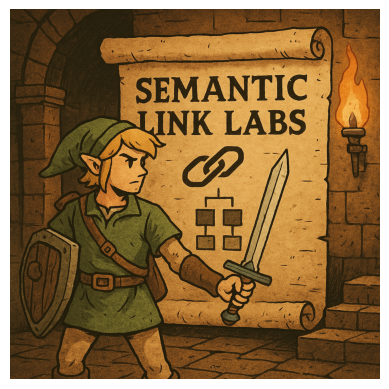

In [38]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load image
image = mpimg.imread("/lakehouse/default/Files/images/zelda_scroll.png")
# Let the axes disappear
plt.axis('off')
# Plot image in the output
image_plot = plt.imshow(image)
